## Actuarial Analysis of Insurance Policies

### Project Overview

#### This project aims to analyze an insurance dataset to understand factors influencing capital at risk and other key actuarial metrics. The analysis includes examining age distribution, gender differences, and the impact of various factors on insurance policies.

## Importations

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_excel("..\\data\\Portfolio.xlsx")

# Converting the date columns to datetime
df['Birth_Date'] = pd.to_datetime(df['Birth_Date'], format='%d/%m/%Y')
df['Effective_Date'] = pd.to_datetime(df['Effective_Date'], format='%d/%m/%Y')
df['Renewal_Date'] = pd.to_datetime(df['Renewal_Date'], format='%d/%m/%Y')
df['Birthday'] = pd.to_datetime(df['Birthday'], format='%d/%m/%Y')

# Check for missing values
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

ID                       0
Gender                   0
Birth_Date               0
Effective_Date           0
Capital                  0
Renewal_Date             0
Age                      0
t                        0
Age_Actuarial            0
Birthday                 0
x                        0
r                        0
s                        0
Age_actuarial_quarter    0
Month                    0
dtype: int64


###### Data Loading: The dataset is loaded from a xlsx file.
###### Date Conversion: Date columns are converted to datetime format for time-based analysis.
###### Missing Values: Missing values are checked and handled by dropping rows with missing values.

## Exploratory Analysis

In [4]:
# Summary statistics
print(df.describe())



                ID                     Birth_Date  \
count  76102.00000                          76102   
mean   38051.50000  1965-01-10 19:59:06.261596256   
min        1.00000            1930-10-28 00:00:00   
25%    19026.25000            1957-07-22 00:00:00   
50%    38051.50000            1964-05-19 12:00:00   
75%    57076.75000            1970-11-23 00:00:00   
max    76102.00000            1991-08-06 00:00:00   
std    21968.89943                            NaN   

                      Effective_Date       Capital  \
count                          76102  7.610200e+04   
mean   2006-06-20 07:19:07.333841536  9.145218e+04   
min              2000-03-07 00:00:00  7.000000e+03   
25%              2004-11-30 00:00:00  5.400000e+04   
50%              2007-01-01 00:00:00  8.000000e+04   
75%              2008-07-04 00:00:00  1.100000e+05   
max              2009-11-29 00:00:00  3.010000e+06   
std                              NaN  6.430220e+04   

                        Renewal_Dat

###### Summary Statistics: Provides an overview of the statistical properties of the dataset.

## Data visualisation

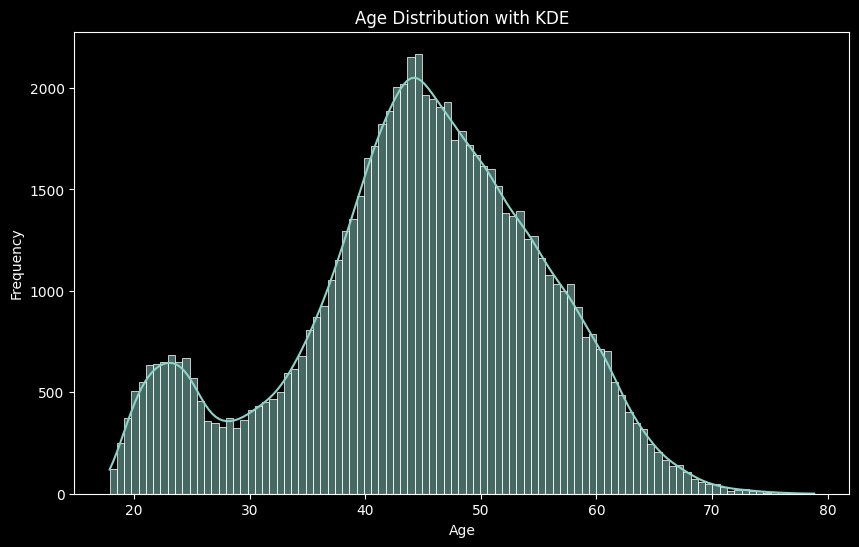

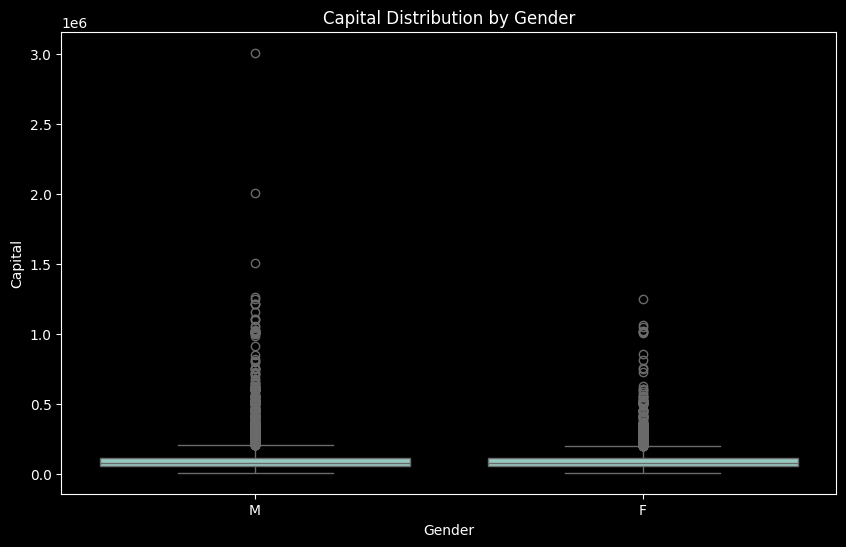

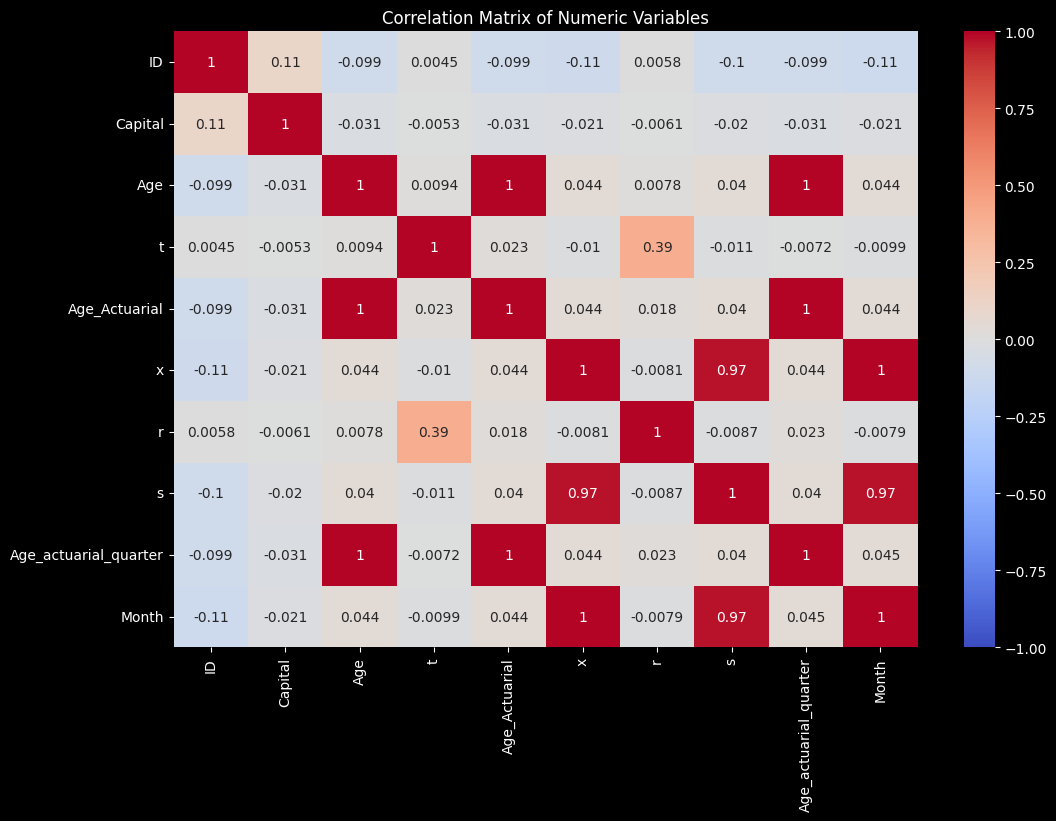

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Capital', data=df)
plt.title('Capital Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Capital')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



###### Age Distribution: Histogram and KDE plot of the age variable.
###### Capital by Gender: Box plot showing the distribution of capital for different genders.
###### Correlation Matrix: Heatmap showing correlations between numerical variables.

## Feature Engineering

In [12]:
# Calculate duration of policy in years
df['Policy_Duration'] = (df['Renewal_Date'] - df['Effective_Date']).dt.days / 365.25

# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the first few rows after transformation
print(df.head())


   ID Birth_Date Effective_Date   Capital Renewal_Date        Age         t  \
0   1 1960-07-10     2000-03-08   55000.0   2009-03-08  48.659822  0.659822   
1   2 1961-08-18     2000-03-07  105000.0   2009-03-07  47.550992  0.550992   
2   3 1963-10-14     2000-03-15   79500.0   2009-03-15  45.418207  0.418207   
3   4 1966-06-26     2000-03-15   74500.0   2009-03-15  42.718686  0.718686   
4   5 1942-09-30     2000-03-07  140000.0   2009-03-07  66.433949  0.433949   

   Age_Actuarial   Birthday         x  r  s  Age_actuarial_quarter  Month  \
0             49 2009-07-10  0.180822  4  1                  48.75      3   
1             48 2009-08-18  0.178082  3  1                  47.50      3   
2             45 2009-10-14  0.200000  3  1                  45.50      3   
3             43 2009-06-26  0.200000  4  1                  42.75      3   
4             66 2009-09-30  0.178082  3  1                  66.50      3   

   Policy_Duration  Gender_M  
0         8.999316      True  


###### Policy Duration: Created a new feature representing the duration of the policy in years.
###### Categorical Variables: Gender is converted into numeric format using one-hot encoding.

## Statistical Analysis

In [13]:
import scipy.stats as stats

# T-test for Capital difference by Gender
male_capital = df[df['Gender_M'] == 1]['Capital']
female_capital = df[df['Gender_M'] == 0]['Capital']
t_stat, p_value = stats.ttest_ind(male_capital, female_capital)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 12.783369723636199, P-value: 2.2190617548929645e-37


###### T-Test: Conducted a t-test to assess whether there is a significant difference in capital between genders. The high t-statistic and low p-value indicate a significant difference.

## Modeling and Insights

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['Age', 'Policy_Duration', 'Gender_M', 'Age_Actuarial', 'Age_actuarial_quarter', 'Month']]
y = df['Capital']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R-squared: {r2}')


Mean Squared Error: 4063828778.0531797, R-squared: 0.0051594108835884


###### Modeling: A linear regression model was trained using age, policy duration, and gender as features.
###### Evaluation:
###### Mean Squared Error: Indicates the average squared difference between predicted and actual values.
###### R-Squared : Shows the proportion of variance explained by the model, which is very low (0.5%).

## Reporting and Visualization

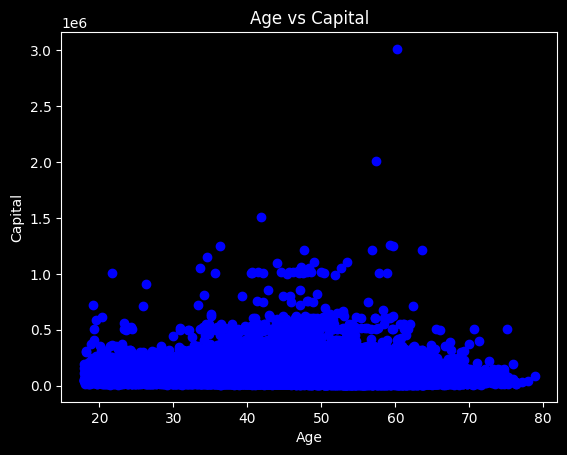

In [16]:
import matplotlib.pyplot as plt

# Visualizing the impact of Age on Capital
plt.scatter(df['Age'], df['Capital'], c='blue')
plt.xlabel('Age')
plt.ylabel('Capital')
plt.title('Age vs Capital')
plt.show()


###### Visualization: Scatter plot illustrating the relationship between age and capital.
### Conclusion
#### Significant Findings: The t-test revealed a significant difference in capital between genders.
##### Model Performance: The linear regression model's performance was limited, as indicated by the high MSE and low R².
##### Next Steps: Consider exploring additional features, trying different models, and performing cross-validation to improve insights and model accuracy.
